In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load CSV files and assign lowercase column names
reports = pd.read_csv('reports.csv')
states = pd.read_csv('states.csv')
measures = pd.read_csv('measures.csv')
questions = pd.read_csv('questions.csv')
national_results = pd.read_csv('national_results.csv')
state_results = pd.read_csv('state_results.csv')
responses = pd.read_csv('responses.csv')

# Assign names to dataframes for display
reports.name = 'reports'
states.name = 'states'
measures.name = 'measures'
questions.name = 'questions'
national_results.name = 'national_results'
state_results.name = 'state_results'
responses.name = 'responses'

dataframes = [reports, states, measures, questions, national_results, state_results, responses]

# Convert column names to lowercase for all dataframes
for df in dataframes:
    df.columns = df.columns.str.lower()
    print(f"Column names of DataFrame {df.name}:")
    print(df.columns.tolist())
    print("=" * 50)

# Merge dataframes using appropriate keys and join methods
merged = (national_results
               .merge(state_results, on=['release period', 'measure id'], how = 'inner')
               .merge(measures, on='measure id', how = 'inner')
               .merge(questions, on='measure id', how = 'inner')
               .merge(reports, on='release period', how = 'inner')
               .merge(states, on='state')
               .merge(responses, on=['release period', 'state'], how = 'inner'))

# Export the merged dataset to a new CSV file
#merged.to_csv('hcahps.csv', index=False)

# Display the first few rows of the merged dataframe
merged.info()


Column names of DataFrame reports:
['release period', 'start date', 'end date']
Column names of DataFrame states:
['state', 'state name', 'region']
Column names of DataFrame measures:
['measure id', 'measure', 'type']
Column names of DataFrame questions:
['question num', 'measure id', 'question', 'bottom-box answer', 'middle-box answer', 'top-box answer']
Column names of DataFrame national_results:
['release period', 'measure id', 'bottom-box percentage', 'middle-box percentage', 'top-box percentage']
Column names of DataFrame state_results:
['release period', 'state', 'measure id', 'bottom-box percentage', 'middle-box percentage', 'top-box percentage']
Column names of DataFrame responses:
['release period', 'state', 'facility id', 'completed surveys', 'response rate (%)']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 810407 entries, 0 to 810406
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----

Bottom-box data:
release period
2015-07-01    7.947368
2016-07-01    7.842105
2017-07-01    7.578947
2018-07-01    7.578947
2019-07-01    7.789474
2020-07-01    7.736842
2021-07-01    7.526316
2022-07-01    8.789474
2023-07-01    9.105263
Name: bottom-box percentage_x, dtype: float64
Middle-box data:
release period
2015-07-01    20.736842
2016-07-01    20.526316
2017-07-01    20.526316
2018-07-01    20.157895
2019-07-01    19.947368
2020-07-01    19.631579
2021-07-01    19.842105
2022-07-01    20.315789
2023-07-01    21.210526
Name: middle-box percentage_x, dtype: float64
Top-box data:
release period
2015-07-01    71.315789
2016-07-01    71.631579
2017-07-01    71.894737
2018-07-01    72.263158
2019-07-01    72.263158
2020-07-01    72.631579
2021-07-01    72.631579
2022-07-01    70.894737
2023-07-01    69.684211
Name: top-box percentage_x, dtype: float64


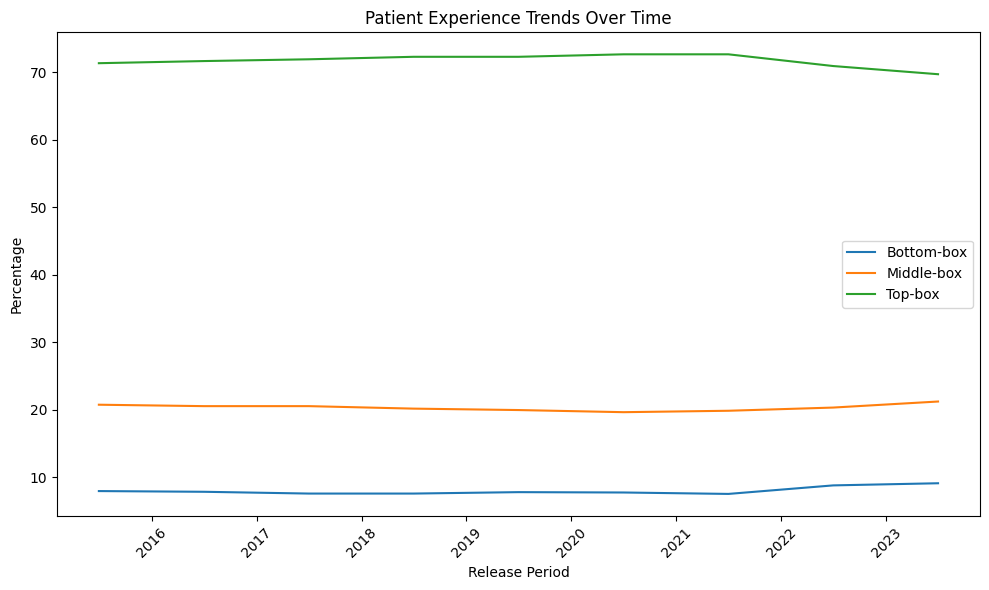

In [ ]:
national_data = merged.copy()

# Convert release period to datetime format
national_data['release period'] = pd.to_datetime(national_data['release period'], format='%m_%Y')

# Group data by release period and calculate mean percentages
grouped_data = national_data.groupby('release period')[['bottom-box percentage_x', 'middle-box percentage_x', 'top-box percentage_x']].mean()

# Plot trends over time
plt.figure(figsize=(10, 6))

bottom_box_data = grouped_data['bottom-box percentage_x']
print("Bottom-box data:")
print(bottom_box_data)
plt.plot(grouped_data.index, bottom_box_data, label='Bottom-box')

middle_box_data = grouped_data['middle-box percentage_x']
print("Middle-box data:")
print(middle_box_data)
plt.plot(grouped_data.index, middle_box_data, label='Middle-box')

top_box_data = grouped_data['top-box percentage_x']
print("Top-box data:")
print(top_box_data)
plt.plot(grouped_data.index, top_box_data, label='Top-box')

plt.xlabel('Release Period')
plt.ylabel('Percentage')
plt.title('Patient Experience Trends Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


<ipython-input-7-3d3341656da3>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  significant_measures = merged.groupby('measure')['bottom-box percentage_x', 'middle-box percentage_x', 'top-box percentage_x'].mean().std(axis=1).sort_values(ascending=False).head(5)


Measures with Significant Changes Over the Years:
measure
Discharge Information                  46.667655
Communication with Doctors             41.849345
Communication with Nurses              40.919000
Cleanliness of Hospital Environment    35.840076
Overall Hospital Rating                34.234667
dtype: float64


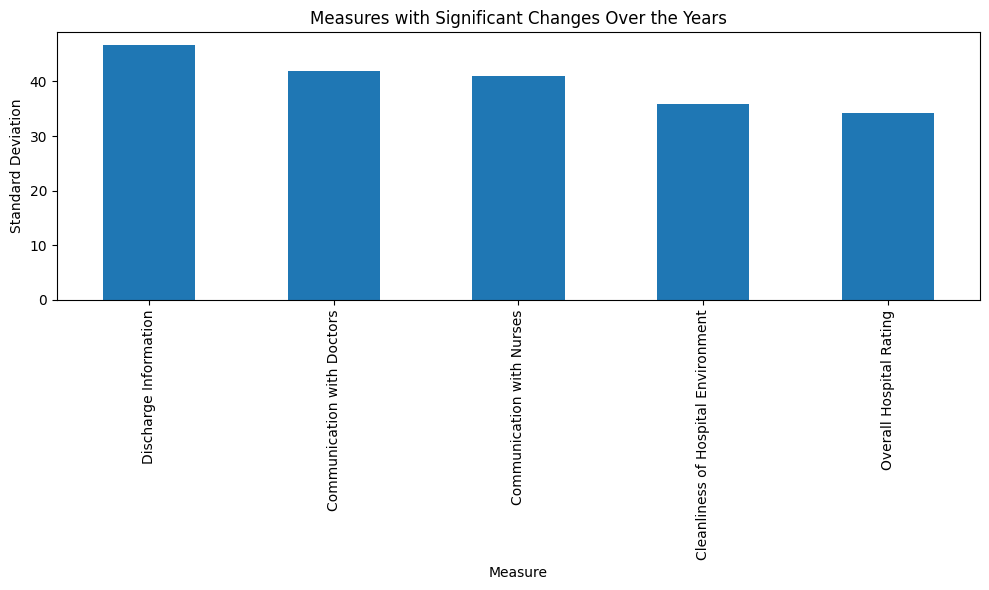

In [ ]:
# Identify specific measures with significant changes over the years
significant_measures = merged.groupby('measure')['bottom-box percentage_x', 'middle-box percentage_x', 'top-box percentage_x'].mean().std(axis=1).sort_values(ascending=False).head(5)
print("Measures with Significant Changes Over the Years:")
print(significant_measures)

# Plotting measures with significant changes
plt.figure(figsize=(10, 6))
significant_measures.plot(kind='bar')
plt.xlabel('Measure')
plt.ylabel('Standard Deviation')
plt.title('Measures with Significant Changes Over the Years')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


Bottom-box Data:
              state name  bottom-box percentage_y              region
0                Alabama                 8.341169  East South Central
1                 Alaska                 7.748744             Pacific
2                Arizona                 9.512388            Mountain
3               Arkansas                 8.166578  West South Central
4             California                10.271781             Pacific
5               Colorado                 6.835801            Mountain
6            Connecticut                 8.959864         New England
7               Delaware                 8.759171      South Atlantic
8   District of Columbia                13.708724      South Atlantic
9                Florida                10.727193      South Atlantic
10               Georgia                 9.170258      South Atlantic
11                Hawaii                 8.296151             Pacific
12                 Idaho                 6.073794            Mountain
13 

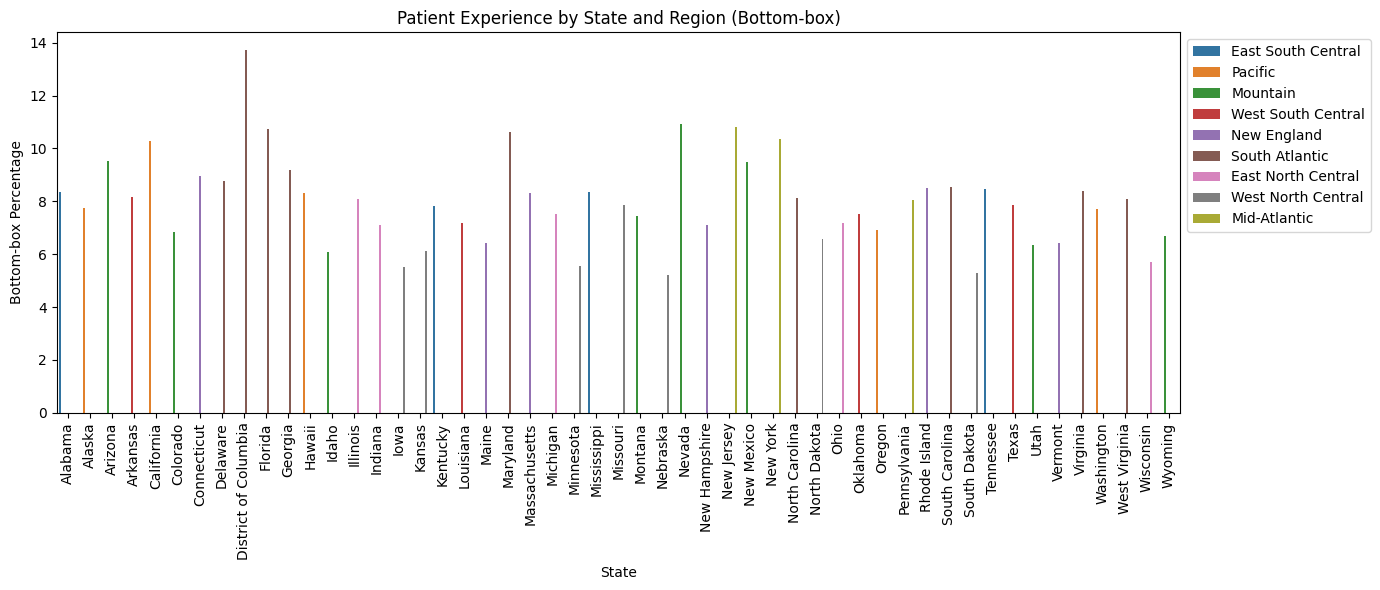

Middle-box Data:
              state name  middle-box percentage_y              region
0                Alabama                18.793413  East South Central
1                 Alaska                21.763819             Pacific
2                Arizona                21.937619            Mountain
3               Arkansas                19.541702  West South Central
4             California                22.189885             Pacific
5               Colorado                19.702699            Mountain
6            Connecticut                21.626657         New England
7               Delaware                21.492026      South Atlantic
8   District of Columbia                23.095169      South Atlantic
9                Florida                21.631266      South Atlantic
10               Georgia                19.999347      South Atlantic
11                Hawaii                20.712228             Pacific
12                 Idaho                19.273602            Mountain
13 

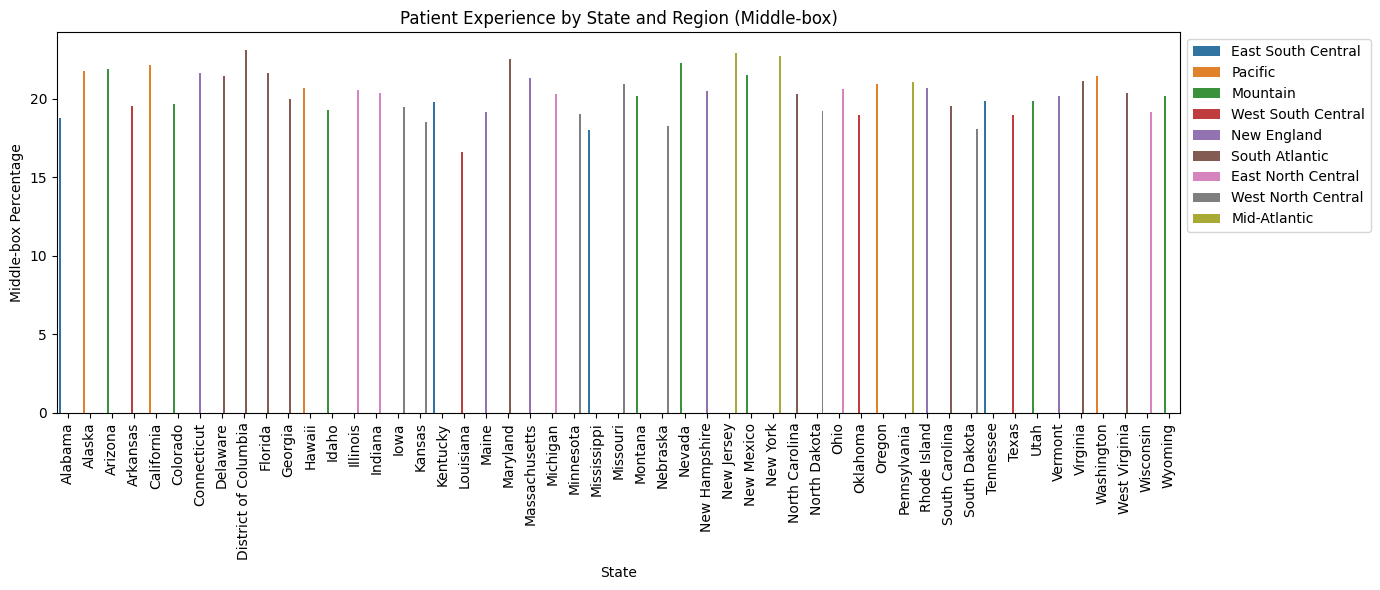

Top-box Data:
              state name  top-box percentage_y              region
0                Alabama             72.865418  East South Central
1                 Alaska             70.487437             Pacific
2                Arizona             68.549993            Mountain
3               Arkansas             72.291721  West South Central
4             California             67.538334             Pacific
5               Colorado             73.461500            Mountain
6            Connecticut             69.413480         New England
7               Delaware             69.748804      South Atlantic
8   District of Columbia             63.196107      South Atlantic
9                Florida             67.641541      South Atlantic
10               Georgia             70.830395      South Atlantic
11                Hawaii             70.991621             Pacific
12                 Idaho             74.652604            Mountain
13              Illinois             71.317705  

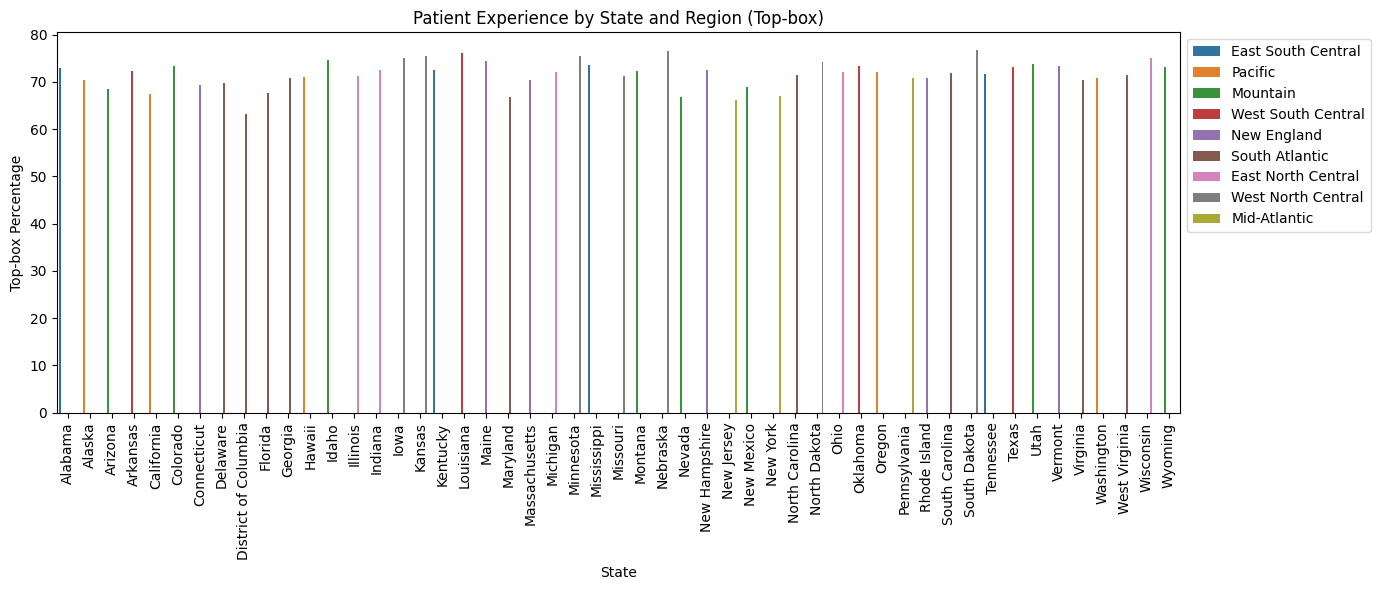

In [ ]:
# Group data by state and region, and calculate mean percentages
grouped_data = merged.groupby(['state name', 'region'])[['bottom-box percentage_y', 'middle-box percentage_y', 'top-box percentage_y']].mean().reset_index()

# Create a bar plot for bottom-box, middle-box, and top-box percentages by state
plt.figure(figsize=(12, 6))
bottom_box_data = grouped_data[['state name', 'bottom-box percentage_y', 'region']]
print("Bottom-box Data:")
print(bottom_box_data)
sns.barplot(data=bottom_box_data, x='state name', y='bottom-box percentage_y', hue='region', errorbar=None)
plt.xlabel('State')
plt.ylabel('Bottom-box Percentage')
plt.title('Patient Experience by State and Region (Bottom-box)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Create a bar plot for middle-box percentages by state
plt.figure(figsize=(12, 6))
middle_box_data = grouped_data[['state name', 'middle-box percentage_y', 'region']]
print("Middle-box Data:")
print(middle_box_data)
sns.barplot(data=middle_box_data, x='state name', y='middle-box percentage_y', hue='region', errorbar=None)
plt.xlabel('State')
plt.ylabel('Middle-box Percentage')
plt.title('Patient Experience by State and Region (Middle-box)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Create a bar plot for top-box percentages by state
plt.figure(figsize=(12, 6))
top_box_data = grouped_data[['state name', 'top-box percentage_y', 'region']]
print("Top-box Data:")
print(top_box_data)
sns.barplot(data=top_box_data, x='state name', y='top-box percentage_y', hue='region', errorbar=None)
plt.xlabel('State')
plt.ylabel('Top-box Percentage')
plt.title('Patient Experience by State and Region (Top-box)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
df = merged.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810407 entries, 0 to 810406
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   release period           810407 non-null  object
 1   measure id               810407 non-null  object
 2   bottom-box percentage_x  810407 non-null  int64 
 3   middle-box percentage_x  810407 non-null  int64 
 4   top-box percentage_x     810407 non-null  int64 
 5   state                    810407 non-null  object
 6   bottom-box percentage_y  810407 non-null  int64 
 7   middle-box percentage_y  810407 non-null  int64 
 8   top-box percentage_y     810407 non-null  int64 
 9   measure                  810407 non-null  object
 10  type                     810407 non-null  object
 11  question num             810407 non-null  int64 
 12  question                 810407 non-null  object
 13  bottom-box answer        810407 non-null  object
 14  middle-box answer   

Mean Composite Data:
bottom-box percentage_x     7.912213
middle-box percentage_x    16.985785
top-box percentage_x       75.102002
dtype: float64
Mean Individual Data:
bottom-box percentage_x     8.667280
middle-box percentage_x    23.050981
top-box percentage_x       68.281739
dtype: float64


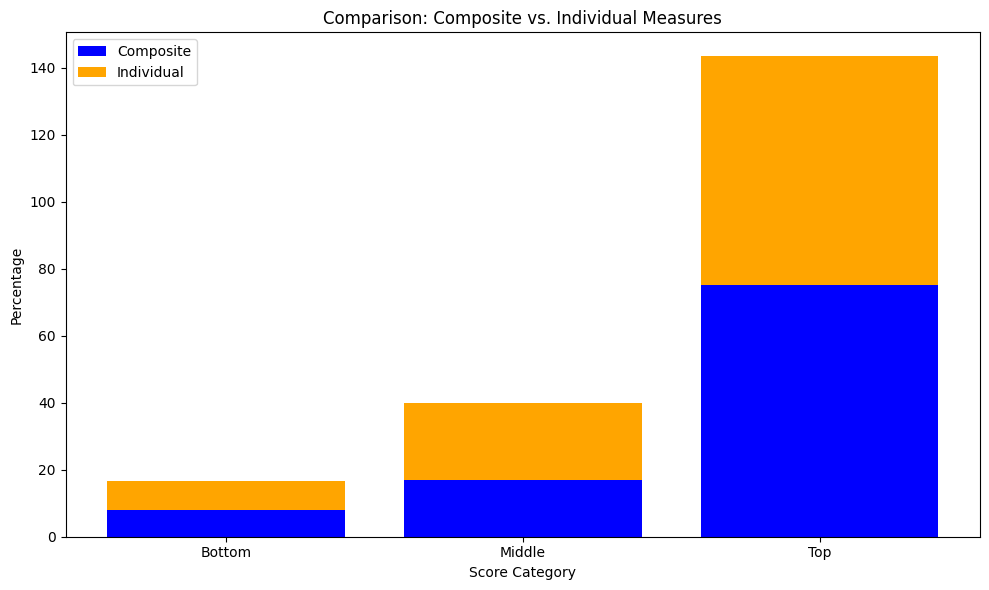

In [ ]:
composite_measures = ['H_COMP_1', 'H_COMP_2', 'H_COMP_3', 'H_COMP_4', 'H_COMP_5']
individual_measures = ['H_CLEAN_HSP', 'H_HSP_RATING_9', 'H_QUIET_HSP', 'H_RECMND_HSP']

composite_data = df[df['measure id'].isin(composite_measures)]
individual_data = df[df['measure id'].isin(individual_measures)]

mean_composite = composite_data[['bottom-box percentage_x', 'middle-box percentage_x', 'top-box percentage_x']].mean()
mean_individual = individual_data[['bottom-box percentage_x', 'middle-box percentage_x', 'top-box percentage_x']].mean()

print("Mean Composite Data:")
print(mean_composite)

print("Mean Individual Data:")
print(mean_individual)

plt.figure(figsize=(10, 6))

# Bar plot for composite measures
plt.bar(['Bottom', 'Middle', 'Top'], mean_composite, label='Composite', color='blue')

# Bar plot for individual measures
plt.bar(['Bottom', 'Middle', 'Top'], mean_individual, bottom=mean_composite, label='Individual', color='orange')

plt.xlabel('Score Category')
plt.ylabel('Percentage')
plt.title('Comparison: Composite vs. Individual Measures')
plt.legend()
plt.tight_layout()

plt.show()


Data for Bottom-box:
release period
2015-07-01    7.947368
2016-07-01    7.842105
2017-07-01    7.578947
2018-07-01    7.578947
2019-07-01    7.789474
2020-07-01    7.736842
2021-07-01    7.526316
2022-07-01    8.789474
2023-07-01    9.105263
Name: bottom-box percentage_x, dtype: float64
Data for Middle-box:
release period
2015-07-01    20.736842
2016-07-01    20.526316
2017-07-01    20.526316
2018-07-01    20.157895
2019-07-01    19.947368
2020-07-01    19.631579
2021-07-01    19.842105
2022-07-01    20.315789
2023-07-01    21.210526
Name: middle-box percentage_x, dtype: float64
Data for Top-box:
release period
2015-07-01    71.315789
2016-07-01    71.631579
2017-07-01    71.894737
2018-07-01    72.263158
2019-07-01    72.263158
2020-07-01    72.631579
2021-07-01    72.631579
2022-07-01    70.894737
2023-07-01    69.684211
Name: top-box percentage_x, dtype: float64


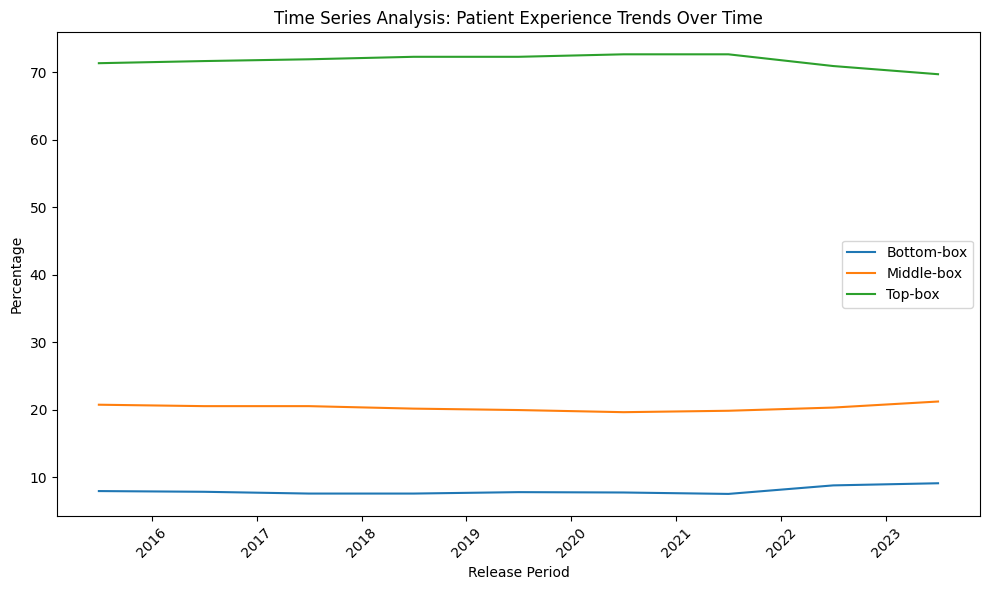

In [ ]:
# Convert release period to datetime format
df['release period'] = pd.to_datetime(df['release period'], format='%m_%Y')

# Group data by release period and calculate mean percentages
grouped_data = df.groupby('release period')[['bottom-box percentage_x', 'middle-box percentage_x', 'top-box percentage_x']].mean()

# Print the data that will be plotted
print("Data for Bottom-box:")
print(grouped_data['bottom-box percentage_x'])

print("Data for Middle-box:")
print(grouped_data['middle-box percentage_x'])

print("Data for Top-box:")
print(grouped_data['top-box percentage_x'])

# Plot patient experience scores over time
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data['bottom-box percentage_x'], label='Bottom-box')
plt.plot(grouped_data.index, grouped_data['middle-box percentage_x'], label='Middle-box')
plt.plot(grouped_data.index, grouped_data['top-box percentage_x'], label='Top-box')
plt.xlabel('Release Period')
plt.ylabel('Percentage')
plt.title('Time Series Analysis: Patient Experience Trends Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Correlation Data:
                         bottom-box percentage_x  middle-box percentage_x  \
bottom-box percentage_x                 1.000000                -0.366428   
middle-box percentage_x                -0.366428                 1.000000   
top-box percentage_x                   -0.035286                -0.916937   

                         top-box percentage_x  
bottom-box percentage_x             -0.035286  
middle-box percentage_x             -0.916937  
top-box percentage_x                 1.000000  


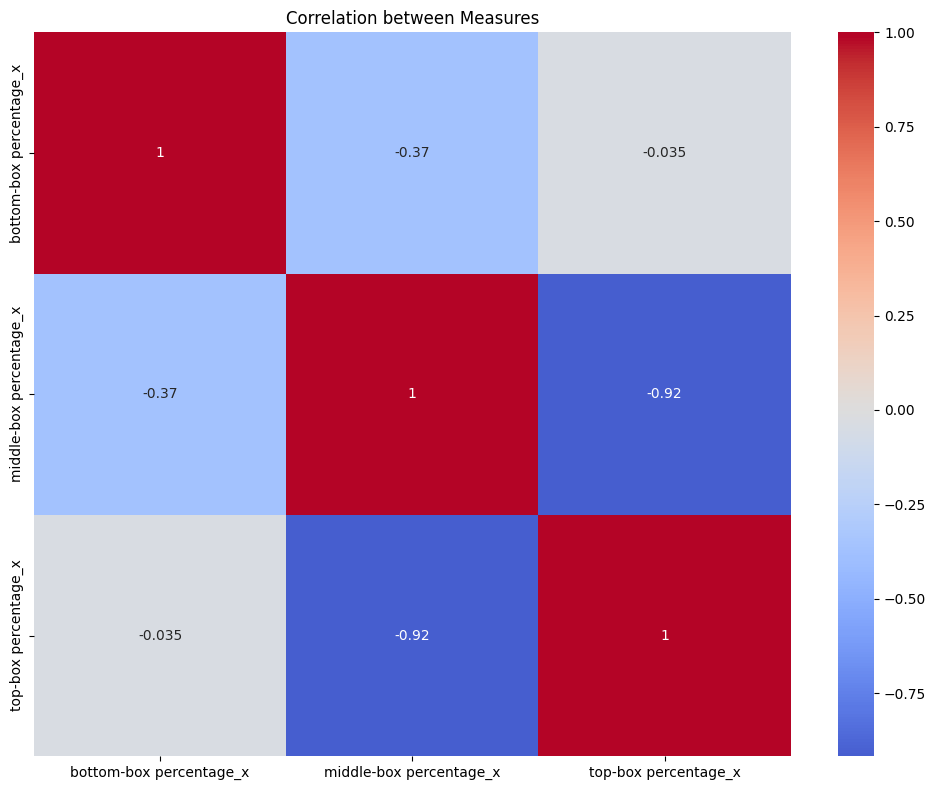

In [ ]:
# Filter for necessary columns
correlation_data = df[['bottom-box percentage_x', 'middle-box percentage_x', 'top-box percentage_x', 'measure']]

# Pivot data to create a correlation matrix
correlation_matrix = correlation_data.pivot_table(index='measure', values=['bottom-box percentage_x', 'middle-box percentage_x', 'top-box percentage_x'], aggfunc='mean')

# Calculate correlations
correlation_matrix = correlation_matrix.corr()

# Print the correlation data
print("Correlation Data:")
print(correlation_matrix)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Measures')
plt.tight_layout()

plt.show()


Hospital ID: 210068
Top-Box Percentage: 72.63
Hospital ID: 360366
Top-Box Percentage: 72.63
Hospital ID: 670130
Top-Box Percentage: 72.63
Hospital ID: 670110
Top-Box Percentage: 72.39
Hospital ID: 170201
Top-Box Percentage: 72.34
Hospital ID: 263304
Top-Box Percentage: 72.34
Hospital ID: 330409
Top-Box Percentage: 72.34
Hospital ID: 453312
Top-Box Percentage: 72.34
Hospital ID: 463302
Top-Box Percentage: 72.34
Hospital ID: 493302
Top-Box Percentage: 72.34


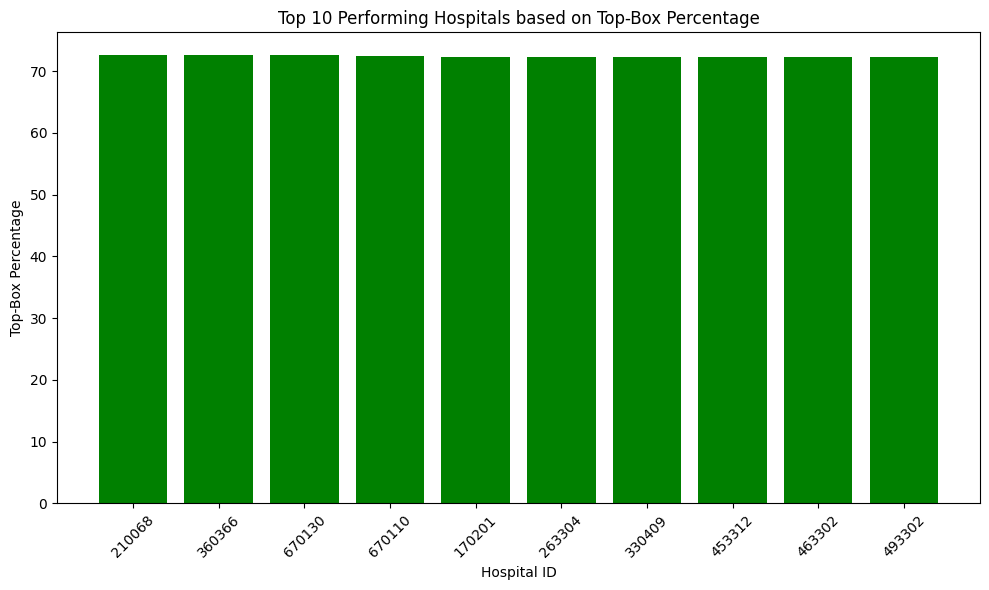

In [ ]:
# Group data by hospital and calculate average scores
hospital_scores = df.groupby('facility id')[['bottom-box percentage_x', 'middle-box percentage_x', 'top-box percentage_x']].mean()

# Filter for hospitals with consistently high scores (e.g., top 10%)
top_hospitals = hospital_scores[
    (hospital_scores['top-box percentage_x'] > hospital_scores['top-box percentage_x'].quantile(0.9))
]

# Sort top_hospitals by 'top-box percentage_x' and select the top 10
top_10_hospitals = top_hospitals.nlargest(10, 'top-box percentage_x')

def analyze_best_practices(hospitals):
    for hospital_id, scores in hospitals.iterrows():
        print(f"Hospital ID: {hospital_id}")
        print(f"Top-Box Percentage: {scores['top-box percentage_x']:.2f}")

# Run the analysis on top-performing hospitals
analyze_best_practices(top_10_hospitals)

# Create a bar plot for the top 10 performing hospitals
plt.figure(figsize=(10, 6))
plt.bar(top_10_hospitals.index, top_10_hospitals['top-box percentage_x'], color='green')
plt.xlabel('Hospital ID')
plt.ylabel('Top-Box Percentage')
plt.title('Top 10 Performing Hospitals based on Top-Box Percentage')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Data being plotted:
                   bottom-box percentage_x  middle-box percentage_x  \
type                                                                  
Composite Measure                 8.097250                19.766217   
Global Item                       6.500457                21.715800   
Individual Item                   8.667280                23.050981   

                   top-box percentage_x  
type                                     
Composite Measure             72.136533  
Global Item                   71.783743  
Individual Item               68.281739  


<Figure size 1000x600 with 0 Axes>

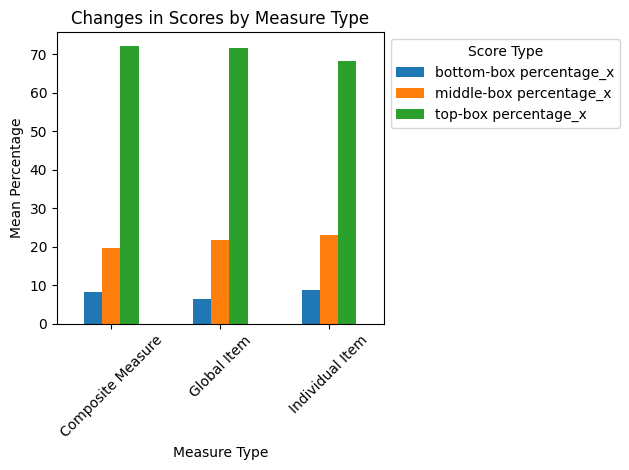

In [ ]:
# Select relevant columns for analysis
measure_type_cols = ['measure', 'type', 'bottom-box percentage_x', 'middle-box percentage_x', 'top-box percentage_x']
measure_type_data = df[measure_type_cols]

# Group data by measure type and calculate mean scores
mean_scores_by_type = measure_type_data.groupby('type')[['bottom-box percentage_x', 'middle-box percentage_x', 'top-box percentage_x']].mean()

# Print the data being plotted
print("Data being plotted:")
print(mean_scores_by_type)

# Plot changes in scores by measure type
plt.figure(figsize=(10, 6))
mean_scores_by_type.plot(kind='bar')
plt.xlabel('Measure Type')
plt.ylabel('Mean Percentage')
plt.title('Changes in Scores by Measure Type')
plt.xticks(rotation=45)

# Move the legend outside the plot
plt.legend(title='Score Type', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


Data being plotted:
                region state  top-box percentage_x
0   East North Central    IL             71.697717
1   East North Central    IN             71.688032
2   East North Central    MI             71.689859
3   East North Central    OH             71.695891
4   East North Central    WI             71.684534
5   East South Central    AL             71.692283
6   East South Central    KY             71.692105
7   East South Central    MS             71.687826
8   East South Central    TN             71.700144
9         Mid-Atlantic    NJ             71.695660
10        Mid-Atlantic    NY             71.702964
11        Mid-Atlantic    PA             71.701984
12            Mountain    AZ             71.682818
13            Mountain    CO             71.684069
14            Mountain    ID             71.684898
15            Mountain    MT             71.699262
16            Mountain    NM             71.693906
17            Mountain    NV             71.685334
18         

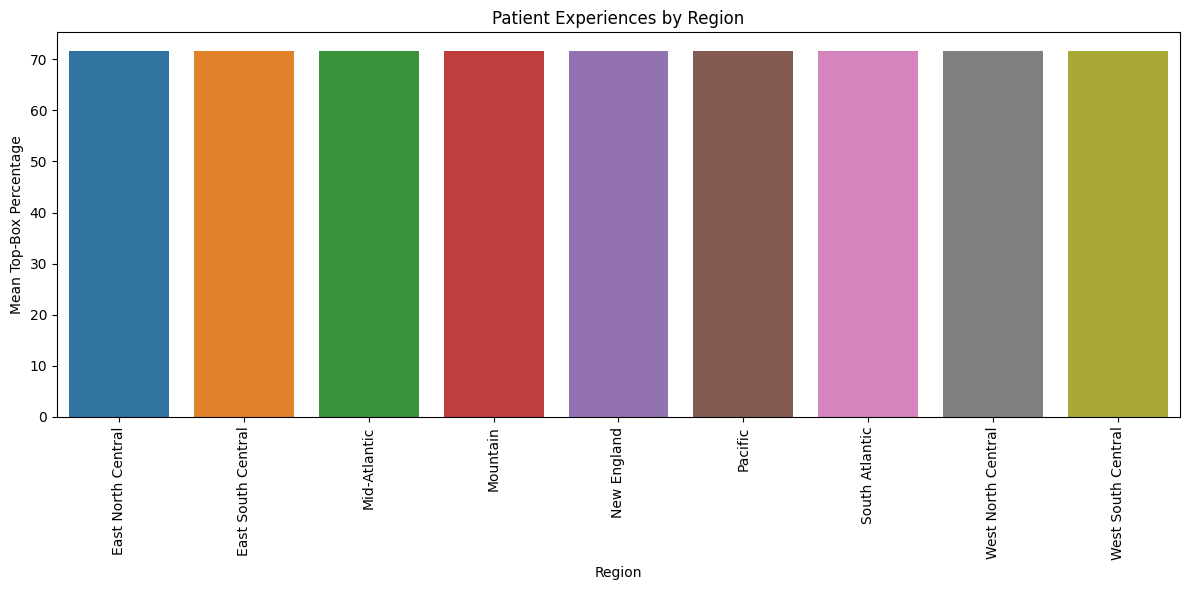

In [ ]:
# Select relevant columns for analysis
region_state_cols = ['region', 'state', 'top-box percentage_x']
region_state_data = df[region_state_cols]

# Group data by region and state and calculate mean satisfaction scores
mean_scores_by_region_state = region_state_data.groupby(['region', 'state'])['top-box percentage_x'].mean().reset_index()

# Print the data being plotted
print("Data being plotted:")
print(mean_scores_by_region_state)

# Plot regional analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='top-box percentage_x', data=mean_scores_by_region_state, errorbar=None)
plt.xlabel('Region')
plt.ylabel('Mean Top-Box Percentage')
plt.title('Patient Experiences by Region')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


Data being plotted:
release period
2015-07-01    71.315789
2016-07-01    71.631579
2017-07-01    71.894737
2018-07-01    72.263158
2019-07-01    72.263158
2020-07-01    72.631579
2021-07-01    72.631579
2022-07-01    70.894737
2023-07-01    69.684211
Name: top-box percentage_x, dtype: float64


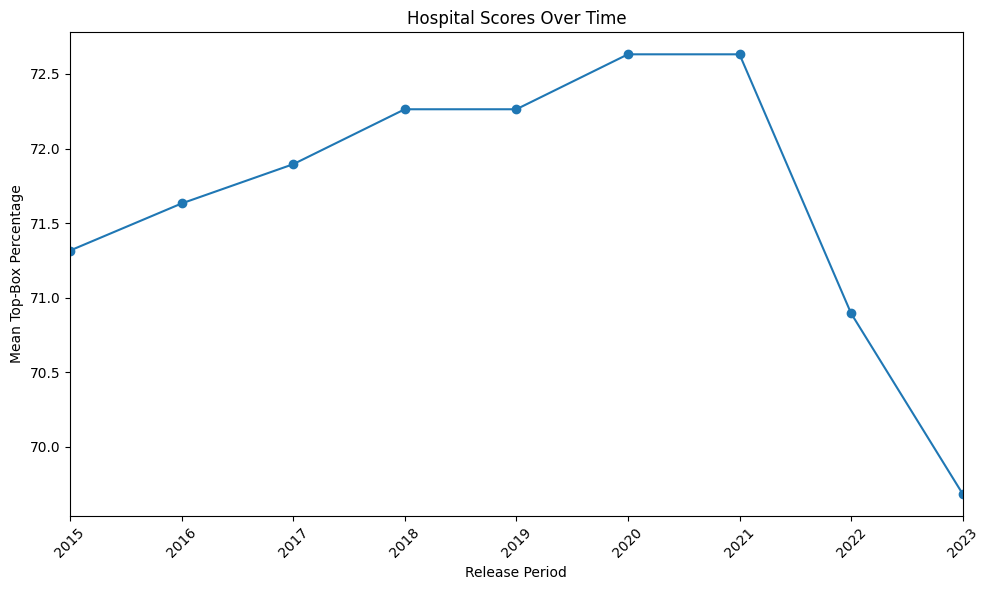

In [ ]:
# Convert release period to datetime
df['release period'] = pd.to_datetime(df['release period'], format='%m_%Y')

# Group data by release period and calculate mean satisfaction scores
mean_scores_by_period = df.groupby('release period')['top-box percentage_x'].mean()

# Print the data being plotted
print("Data being plotted:")
print(mean_scores_by_period)

# Plot time series analysis
plt.figure(figsize=(10, 6))
mean_scores_by_period.plot(marker='o')
plt.xlabel('Release Period')
plt.ylabel('Mean Top-Box Percentage')
plt.title('Hospital Scores Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Data being plotted:
release period
2015-07-01    20.736842
2016-07-01    20.526316
2017-07-01    20.526316
2018-07-01    20.157895
2019-07-01    19.947368
2020-07-01    19.631579
2021-07-01    19.842105
2022-07-01    20.315789
2023-07-01    21.210526
Name: middle-box percentage_x, dtype: float64


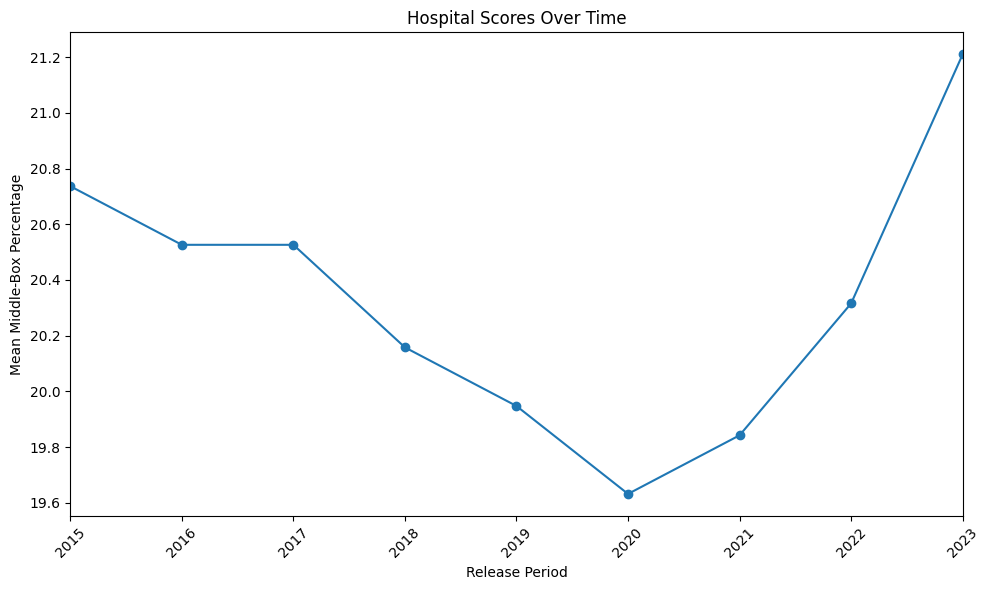

In [ ]:
# Convert release period to datetime
df['release period'] = pd.to_datetime(df['release period'], format='%m_%Y')

# Group data by release period and calculate mean satisfaction scores
mean_scores_by_period = df.groupby('release period')['middle-box percentage_x'].mean()

# Print the data being plotted
print("Data being plotted:")
print(mean_scores_by_period)

# Plot time series analysis
plt.figure(figsize=(10, 6))
mean_scores_by_period.plot(marker='o')
plt.xlabel('Release Period')
plt.ylabel('Mean Middle-Box Percentage')
plt.title('Hospital Scores Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Data being plotted:
release period
2015-07-01    7.947368
2016-07-01    7.842105
2017-07-01    7.578947
2018-07-01    7.578947
2019-07-01    7.789474
2020-07-01    7.736842
2021-07-01    7.526316
2022-07-01    8.789474
2023-07-01    9.105263
Name: bottom-box percentage_x, dtype: float64


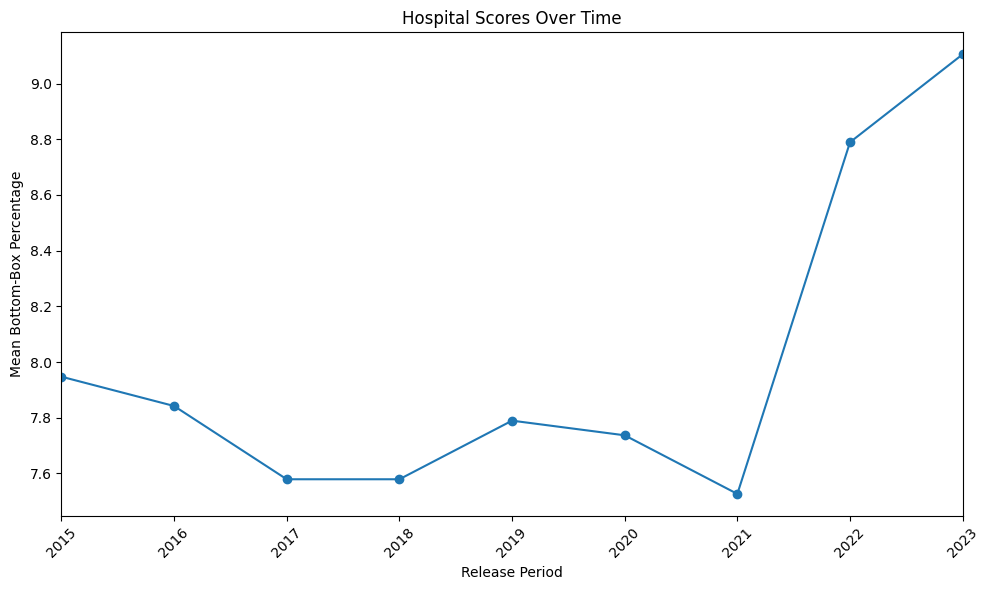

In [ ]:
# Convert release period to datetime
df['release period'] = pd.to_datetime(df['release period'], format='%m_%Y')

# Group data by release period and calculate mean satisfaction scores
mean_scores_by_period = df.groupby('release period')['bottom-box percentage_x'].mean()

# Print the data being plotted
print("Data being plotted:")
print(mean_scores_by_period)

# Plot time series analysis
plt.figure(figsize=(10, 6))
mean_scores_by_period.plot(marker='o')
plt.xlabel('Release Period')
plt.ylabel('Mean Bottom-Box Percentage')
plt.title('Hospital Scores Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Data being plotted:
release period                         2015-07-01  2016-07-01  2017-07-01  \
measure                                                                     
Care Transition                              52.0        52.0        52.0   
Cleanliness of Hospital Environment          74.0        74.0        74.0   
Communication about Medicines                65.0        65.0        65.0   
Communication with Doctors                   82.0        82.0        82.0   
Communication with Nurses                    79.0        80.0        80.0   
Discharge Information                        86.0        87.0        87.0   
Overall Hospital Rating                      71.0        72.0        73.0   
Quietness of Hospital Environment            62.0        62.0        63.0   
Responsiveness of Hospital Staff             68.0        68.0        69.0   
Willingness to Recommend the Hospital        71.0        71.0        72.0   

release period                         2018-07-01  2019

<Figure size 2400x2400 with 0 Axes>

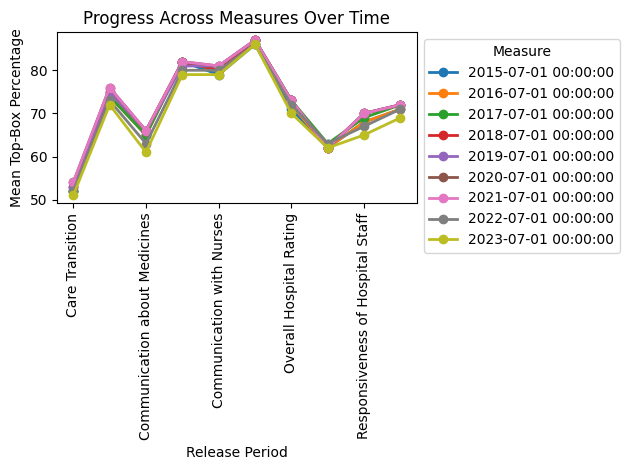

In [ ]:
# Convert release period to datetime
df['release period'] = pd.to_datetime(df['release period'], format='%m_%Y')

# Group data by measure and release period, and calculate mean satisfaction scores
mean_scores_by_measure = df.groupby(['measure', 'release period'])['top-box percentage_x'].mean().unstack()

# Print the data being plotted
print("Data being plotted:")
print(mean_scores_by_measure)

# Plot progress across measures over time
plt.figure(figsize=(24, 24))
mean_scores_by_measure.plot(marker='o', linewidth=2)
plt.xlabel('Release Period')
plt.ylabel('Mean Top-Box Percentage')
plt.title('Progress Across Measures Over Time')
plt.xticks(rotation=90)

# Move the legend outside the plot using bbox_to_anchor
plt.legend(title='Measure', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()


Data being plotted:
measure
Care Transition                      52.564040
Communication about Medicines        64.777929
Quietness of Hospital Environment    62.223595
Responsiveness of Hospital Staff     68.563829
Name: top-box percentage_x, dtype: float64


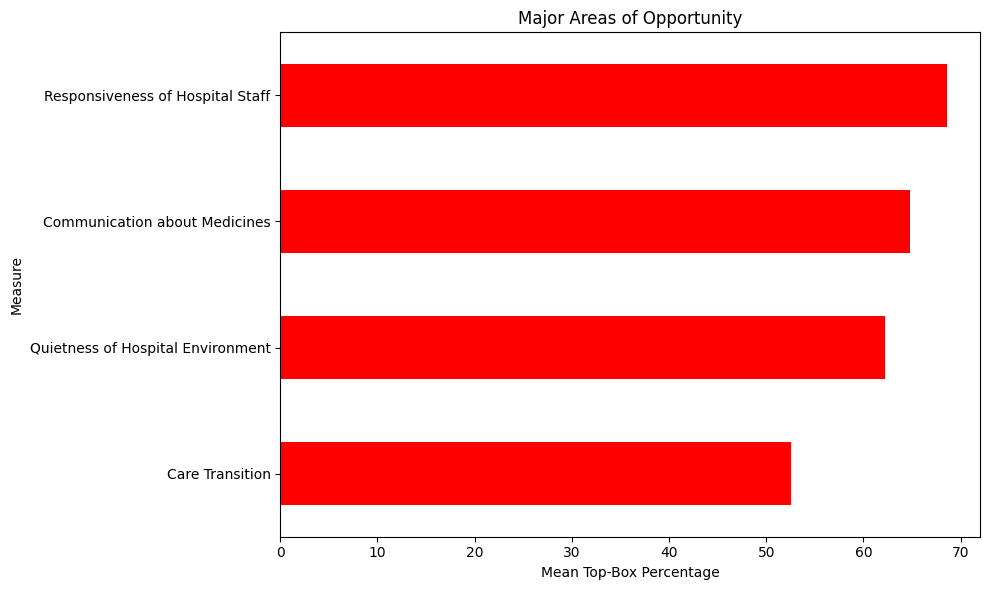

In [ ]:
# Convert release period to datetime
df['release period'] = pd.to_datetime(df['release period'], format='%m_%Y')

# Group data by measure and calculate mean satisfaction scores
mean_scores_by_measure = df.groupby('measure')['top-box percentage_x'].mean()

# Identify measures with consistently low scores or no significant improvement
opportunity_measures = mean_scores_by_measure[mean_scores_by_measure < 70]

# Print the data being plotted
print("Data being plotted:")
print(opportunity_measures)

# Plot measures with major areas of opportunity
plt.figure(figsize=(10, 6))
opportunity_measures.sort_values().plot(kind='barh', color='red')
plt.xlabel('Mean Top-Box Percentage')
plt.ylabel('Measure')
plt.title('Major Areas of Opportunity')
plt.tight_layout()

plt.show()
